# Installing Libraries

In [9]:
!pip install nltk
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install openpyxl
!pip install reshape
!pip install networkx
!pip install python-bidi
!pip install arabic-reshaper

In [42]:
import re
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import ISRIStemmer
import unicodedata
import tkinter as tk
from tkinter import messagebox
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import reshape
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

nltk.download('punkt')
nltk.download('stopwords')
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Oghal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oghal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Oghal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Reading Dataset

In [11]:
df = pd.read_excel('Complaints dataset (1).xlsx')

In [12]:
print("Number Of Rows For The Data:", len(df))

Number Of Rows For The Data: 276292


In [13]:
df.duplicated().sum()

np.int64(7)

In [14]:
df = df.drop_duplicates(keep=False)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
dfu = pd.DataFrame(df[['CASE_DESC' , 'PRODUCT']])

In [17]:
dfu = dfu.drop_duplicates(subset='CASE_DESC', keep=False)

In [18]:
print("Number Of Rows After Deleting The Duplicated Data:", len(dfu))

Number Of Rows After Deleting The Duplicated Data: 132507


In [19]:
dfu.isnull().sum()

CASE_DESC    0
PRODUCT      0
dtype: int64

# Application First 

In [20]:
Pro_Type = dfu['PRODUCT'].unique()
Options = list(Pro_Type) + ['All Above']
print("Choose The PRODUCT Type:")
for i, Type in enumerate(Options):
    print(f"{i + 1}. {Type}")

while True:
    inputpro = int(input("Enter A Number Between 1 And {}: ".format(len(Options))))

    if 1 <= inputpro <= len(Options):
        break 
    else:
        print("Invalid Input. Try Again.")

if inputpro == len(Options):
    theinput = 'All'
    newdf = pd.DataFrame(dfu) 
else:
    theinput = Pro_Type[inputpro - 1]  # Adjust index to match the list
    newdf = pd.DataFrame(dfu[dfu['PRODUCT'] == theinput])

Choose The PRODUCT Type:
1. Internet
2. Mobile
3. All Above


Enter A Number Between 1 And 3:  7


Invalid Input. Try Again.


Enter A Number Between 1 And 3:  3


### Text Preprocessing

In [23]:
def preprocess_text(text):
  

    ###################################################################################
    #Create Tokenization Object To Divide Sentences Into Words.
    tokens = nltk.word_tokenize(text)
    ###################################################################################
    #First, we delete the rubbish because it may connect with other words and make it as one node.
    for r in range(len(tokens)):
        tokens[r] = tokens[r].replace('1' , '0').replace('2' , '0').replace('3' , '0').replace('4' , '0').replace('5' , '0').replace('6' , '0').replace('7' , '0').replace('8' , '0').replace('9' , '0')
        tokens[r] = tokens[r].replace('!' , '0').replace('@' , '0').replace('#' , '0').replace('$' , '0').replace('%' , '0').replace('^' , '0').replace('&' , '0').replace('*' , '0').replace('(' , '0').replace('?' , '0')
        tokens[r] = tokens[r].replace('`' , '0').replace('-' , '0').replace('_' , '0').replace('=' , '0').replace('+' , '0').replace('/' , '0').replace(';' , '0').replace(':' , '0').replace("'" , '0').replace('}' , '0')
        tokens[r] = tokens[r].replace(',' , '0').replace('.' , '0').replace('<' , '0').replace('>' , '0').replace('؛' , '0').replace('،' , '0').replace('؟' , '0').replace("\\" , "0").replace(')' , '0').replace('{' , '0')
        tokens[r] = tokens[r].replace('0' , "")
        
        #https://stackoverflow.com/questions/53239934/add-space-between-arabic-and-english-word-by-regular-expression-in-python
        #This code is made to make a space between Arabic and English words that are connected in one node.
    for s in range(len(tokens)):
        Space = r'[a-zA-Z]+'
        tokens[s] = re.sub(Space, r' \g<0> ', tokens[s])
##################################################################################
    # English  
    #Second, We created set of popular stop words in English. Also a stemming object to get back the root of words.
    #Third, We made all English words as lowercased. and deleted stop words. And stemmed all English words.
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
        
    for e in range(len(tokens)):
        tokens[e] = tokens[e].lower()
        
    for e in range(len(tokens)):
        if tokens[e] in stop_words:
            tokens[e] = ""
            
    for e in range(len(tokens)):
        if 'the' in tokens[e]:
            tokens[e] = ""
            
    for e in range(len(tokens)):
        if 'very' in tokens[e]:
            tokens[e] = ""
            
    for e in range(len(tokens)):
        if 'and' in tokens[e]:
            tokens[e] = ""
            
    for e in range(len(tokens)):
        if 'that' in tokens[e]:
            tokens[e] = ""
            
    for e in range(len(tokens)):
        tokens[e] = stemmer.stem(tokens[e])
        
    for e in range(len(tokens)):
        if 'net' in tokens[e]:
            tokens[e] = 'internet'
###################################################################################
    # Arabic
    #Fourth, We created a set of popular stop words in Arabic, and replaced hamzat to Alef and couple of consitions.
    stop_words_arab = set(stopwords.words('arabic'))
    
    for a in range(len(tokens)):
        if "ً" in tokens[a]:
            tokens[a] = tokens[a].replace("ً" , "") 
            
    for a in range(len(tokens)):
        tokens[a] = tokens[a].replace('ؤ', 'و').replace('ئ', 'ء').replace('آل', 'ال').replace('أل', 'ال').replace('أ', 'ا').replace('آ', 'ا').replace('إ', 'ا').replace('ى', 'ي').replace('ة', 'ه')
            
    for a in range(len(tokens)):
        if tokens[a].startswith("و"):
            tokens[a] = tokens[a].replace("و" , "")
            
    for a in range(len(tokens)):
        if tokens[a].startswith("بال"):
            tokens[a] = tokens[a].replace("بال" , "")
            
    for a in range(len(tokens)):
        if tokens[a].startswith("عال"):
            tokens[a] = tokens[a].replace("عال" , "")
            
    for a in range(len(tokens)):
        if tokens[a].startswith("فال"):
            tokens[a] = tokens[a].replace("فال" , "")
         
    for a in range(len(tokens)):
        if tokens[a].startswith("وال") and "وال" in tokens[a]:
            tokens[a] = tokens[a].replace("وال" , "")
            
    for a in range(len(tokens)):
        if tokens[a].startswith("ال"):
            tokens[a] = tokens[a][2:] 
            
    for a in range(len(tokens)):
        if tokens[a] == "غاء":
            tokens[a] = "الغاء"
            
    for a in range(len(tokens)):
        if tokens[a].endswith("نت"):
            tokens[a] = "انترنت"
        
    for a in range(len(tokens)):    
        if tokens[a] in stop_words_arab:
            tokens[a] = ""
    #################################################
    #https://stackoverflow.com/questions/39137851/how-to-deal-with-repeated-letters-in-arabic
    #This code deletes repeated letters in arabic words.
    for i in range(len(tokens)):
        tokens[i] = re.sub(r'(.)\1+', r'\1', tokens[i])

        
    # https://stackoverflow.com/questions/12628958/remove-small-words-using-python
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    for i in range(len(tokens)):
        tokens[i] = shortword.sub('', tokens[i])

    unique_tokens = set()
    result_tokens = []
    for i in range(len(tokens)):
        if tokens[i] not in unique_tokens:
            unique_tokens.add(tokens[i])
            result_tokens.append(tokens[i])
    processed_text = re.sub(' +', ' ', ' '.join(result_tokens))
        
    return processed_text

In [27]:
Preprocessed = [preprocess_text(x) for x in newdf['CASE_DESC']]

In [28]:
Preprocessed = [text for text in Preprocessed if len(text.split()) > 1]

In [29]:
newdf = newdf.drop(["PRODUCT"] , axis = 1)

In [30]:
print("Number Of Preprocessed Texts Before Deleting Duplicates:", len(Preprocessed))

Number Of Preprocessed Texts Before Deleting Duplicates: 122477


In [31]:
Preprocessed = set(Preprocessed)
Preprocessed = list(Preprocessed)

In [32]:
print("Number Of Preprocessed Texts After Deleting Duplicates:", len(Preprocessed))

Number Of Preprocessed Texts After Deleting Duplicates: 112236


# Backend User Interface

In [43]:
def app():
    user_query = Q.get()
    process_query = preprocess_text(user_query)
    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(Preprocessed)
    tfidf_query = vectorizer.transform([process_query])

    cosine_similarities = cosine_similarity(tfidf_query, tfidf_matrix).flatten()
    
    data = pd.DataFrame()
    data['Preprocessed'] = Preprocessed
    data['Cosine'] = cosine_similarities
    data = data.reset_index(drop=True)

    data = data.sort_values(by='Cosine', ascending=False).drop_duplicates(subset='Cosine')
    top = data['Preprocessed'].head(5)

    result_text = "Most Similar Complaints:\n" 
    for results in top:
        result_text = result_text + f" {results}\n"

    info_text.set(result_text)
    Directed_Button.pack(pady = 10)
    Weighted_Button.pack(pady = 10)

    return top

In [44]:
def directed():
    Graph = nx.DiGraph()
    top = app()

    for s in top:
        s = s.split()
        for i in range(len(s) - 1):
            first_word = get_display(reshape(s[i]))
            second_word = get_display(reshape(s[i + 1]))
            Graph.add_edge(first_word, second_word)

    plt.figure(figsize=(8, 5))
    pos = nx.spring_layout(Graph)
    nx.draw(Graph, pos, with_labels=True, arrows=True, node_size=500, font_size=10)
    plt.title('Directed Graph')

    Second_Window = tk.Toplevel(root)
    Second_Window.title('Directed Graph')
    
    canvas = FigureCanvasTkAgg(plt.gcf(), master=Second_Window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)
    plt.show()
    
    Centrality_Button = tk.Button(Second_Window, text="Get Centrality Measures", command=lambda: Measures(Graph))
    Centrality_Button.pack(pady=10)

def Measures(Graph):
    Degree = nx.degree_centrality(Graph)
    Betweenness = nx.betweenness_centrality(Graph)
    Closeness = nx.closeness_centrality(Graph)

    Inside = tk.Toplevel(root)
    Inside.title('Centrality Measures')

    text = "Degree Centrality:\n"
    for word, value in Degree.items():
        text = text + f"{word}: {value:.2f}\n"
        
    text += "\nBetweenness Centrality values:\n"
    for word, value in Betweenness.items():
        text += f"{word}: {value:.2f}\n"
        
    text += "\nCloseness Centrality values:\n"
    for word, value in Closeness.items():
        text += f"{word}: {value:.2f}\n"

    centrality_text = tk.Text(Inside)
    centrality_text.insert(tk.END, text)
    centrality_text.pack()

In [45]:
#https://pythonprogramming.net/how-to-embed-matplotlib-graph-tkinter-gui/
def weighted():
    
    Graph = nx.Graph()  
    top = app()
    
    word_counts = {}  # Dictionary to store the counts of word pairs
    
    for s in top:
        s = s.split()
        n = len(s)
        
        for i in range(n - 1):
            for j in range(i + 1, n):
                first_word = get_display(reshape(s[i]))
                second_word = get_display(reshape(s[j]))
                word_pair = (first_word, second_word)
                word_counts[word_pair] = word_counts.get(word_pair, 0) + 1

    for (word1, word2), weight in word_counts.items():
        Graph.add_edge(word1, word2, weight=weight)

    plt.figure(figsize=(8, 5))
    pos = nx.spring_layout(Graph)
    labels = nx.get_edge_attributes(Graph, 'weight')
    nx.draw(Graph, pos, with_labels=True, node_size=500, font_size=10)
    nx.draw_networkx_edge_labels(Graph, pos, edge_labels=labels)
    plt.title("Weighted Graph")
    
    Third_Window = tk.Toplevel(root)
    Third_Window.title('Weighted Graph')
    
    canvas = FigureCanvasTkAgg(plt.gcf(), master=Third_Window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

# User Interface

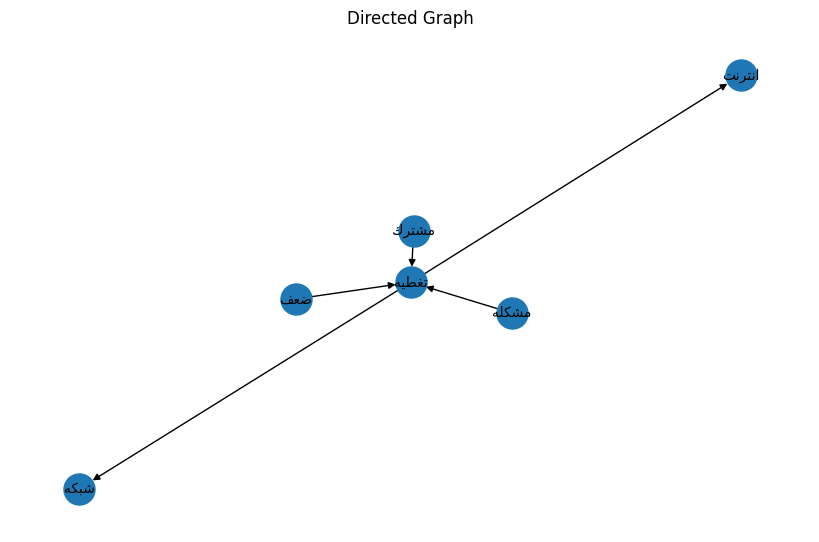

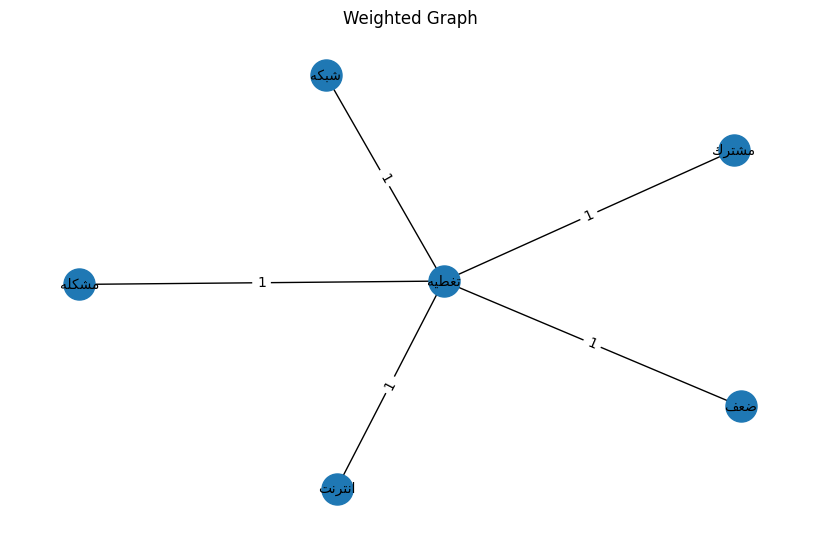

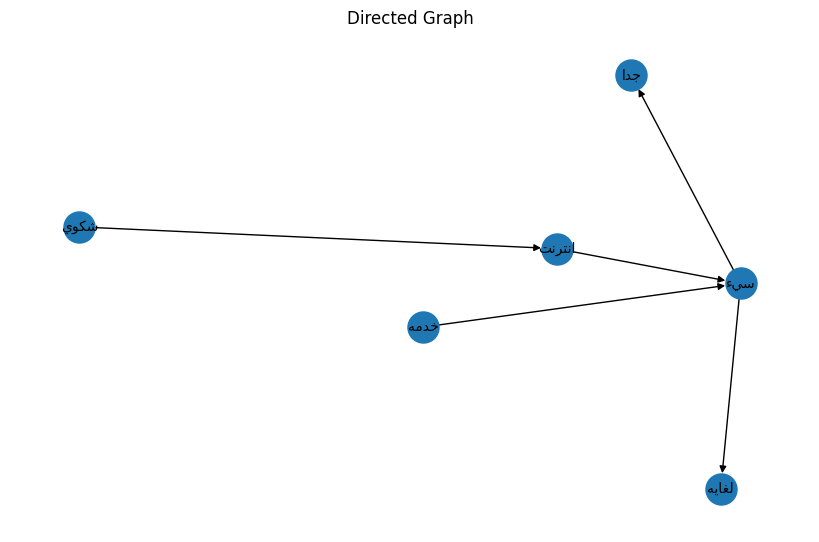

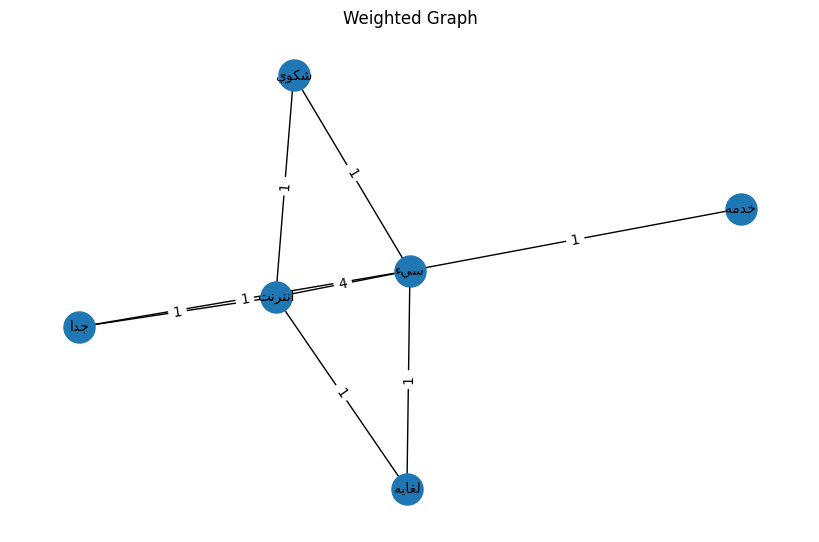

In [46]:
root = tk.Tk()
root.title("Query Finder")

Message = tk.Label(root, text="Enter A Query")
Message.pack(pady=10)

Q = tk.Entry(root)
Q.pack(pady=10)


Query_Button = tk.Button(root, text='Get Results', command=app)
Query_Button.pack(pady=10)

info_text = tk.StringVar()
label_info = tk.Label(root, textvariable=info_text)
label_info.pack(pady = 10)

Directed_Button = tk.Button(root, text = "Get Directed Graph" , command= directed)

Centrality = tk.Button(root, text = "Get Centrality Measures" , command= directed)

Weighted_Button = tk.Button(root, text = "Get Weighted Graph" , command= weighted)


root.mainloop()